# WE04 Universal Bank

### Install required libraries and load data

In [37]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

np.random.seed(1)

In [38]:
universalbank = pd.read_csv("C:/Users/simra/Downloads/UniversalBank.csv")

### Exploring data
For this analysis, the target variable is CD Account.

First, our initial exploration of the data should answer the following questions:
1. How many rows and columns
2. How much of a problem do we have with na's?
3. What types of data are there?
4. What types of data are stored in columns
    1. identify which variables are numeric and may need to be standardized later
    2. identify which variables are categorical and may need to be transformed using and encoders such as one-hot-encoder.
5. Identify errors in the data - this is a common problem with categorical variables where the category is mispelled or spelled differently in some instances.

In [39]:
universalbank.head(3)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0


In [40]:
#basic summary of the data
universalbank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [41]:
#statistical summary of the numeric value in the data
universalbank.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [42]:
universalbank.isna().sum() #checking missing values

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [43]:
category_var_list = list(universalbank.select_dtypes(include='object').columns) #catagorical variables
category_var_list

[]

### Summary the findings from our initial evaluation of the data

* We have total 5000 observations(rows) and 14 columns
* We do not have any categorical variables or any missing valules
* As no categorical variables, no problem with the catogorical class names

### Processing data

#### Conduct any data prepartion that should be done *BEFORE* the data split.

1. As we will not be using the ID and the ZIP Code columns, drop it. 
2. As there is only 1 categorical variables i.e. Education we will encode it with Dummy encoding technique. 

#### Drop any columns/variables we will not be using

In [44]:
universalbank.drop(['ID','ZIP Code'], axis=1, inplace = True)

#### Dummy encoding 

As education is label encoded we need to change it to dummy encoding.

In [45]:
universalbank = universalbank.join(pd.get_dummies(universalbank['Education'],prefix='Education',drop_first = True))
universalbank.drop('Education', axis=1, inplace = True)

In [46]:
universalbank.head(3)

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_2,Education_3
0,25,1,49,4,1.6,0,0,1,0,0,0,0,0
1,45,19,34,3,1.5,0,0,1,0,0,0,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,0,0


Considering base as Undergrad, Education_2 is Graduate level and Education_3 is Advanced/Professional  

### Split data (train/test) 

In [47]:
# split the data into validation and training set
train_df, test_df = train_test_split(universalbank, test_size=0.3)

# to reduce repetition in later code, creating variables to represent the columns that are predictors and target
target = 'CD Account'
predictors = list(universalbank.columns)
predictors.remove(target)

### Conduct any data prepartion that should be done *AFTER* the data split

1. As we dont have any missing numeric values we will dont need to impute it with mean of the variable/column
2. We will remove differences in scale by standardizing the numerical variables

#### Standardize numeric values

In [48]:
# create a standard scaler and fit it to the training set of predictors
scaler = preprocessing.StandardScaler()
cols_to_stdize = ['Age','Experience','Income','Family','CCAvg','Mortgage']                
               
# Transform the predictors of training and validation sets
train_df[cols_to_stdize] = scaler.fit_transform(train_df[cols_to_stdize]) 

test_df[cols_to_stdize] = scaler.transform(test_df[cols_to_stdize]) 

#### To reduce repetition in later code, creating variables to represent the train, test predictors and target

In [49]:
X_train = train_df[predictors]
y_train = train_df[target] 
X_test = test_df[predictors]
y_test= test_df[target]

### Modeling data

First, let's create a dataframe to load the model performance metrics into.

In [50]:
performance = pd.DataFrame({"model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1": []})

### Logistic Regression 

#### Logistic Regression Random Search CV using default, L1, L2, Elastic, liblinear regularization

Conduct an initial random search across a wide range of possible parameters.

In [51]:
score_measure = "recall"
kfolds = 5

param_grid = {
    'max_iter':np.arange(800,1200),
    'penalty': ['None','l1','l2','elasticnet'],
    'solver':['saga','liblinear']
}

log_reg = LogisticRegression()
rand_search = RandomizedSearchCV(estimator = log_reg, param_distributions=param_grid, cv=kfolds, n_iter=500,
                           scoring=score_measure, verbose=1, n_jobs=-1, 
                           return_train_score=True)

_ = rand_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {rand_search.best_score_}")
print(f"... with parameters: {rand_search.best_params_}")

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
The best recall score is 0.6708245243128964
... with parameters: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 1065}


### Logistic Regression Grid Search CV using default, L1, L2, Elastic, liblinear regularization

Conduct an exhaustive search across a smaller range of parameters around the parameters found in the initial random search.

In [52]:
score_measure = "recall"
kfolds = 5
max_iter = rand_search.best_params_['max_iter']
penalty = rand_search.best_params_['penalty']
solver = rand_search.best_params_['solver']

param_grid = {
    'max_iter': np.arange(max_iter-5,max_iter+5),  
    'penalty': [penalty],
    'solver': [solver]
}

log_reg_model = LogisticRegression()
grid_search = GridSearchCV(estimator = log_reg_model, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search.best_score_}")
print(f"... with parameters: {grid_search.best_params_}")

bestrecall_logistic = grid_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best recall score is 0.6708245243128964
... with parameters: {'max_iter': 1060, 'penalty': 'l2', 'solver': 'liblinear'}


In [53]:
c_matrix = confusion_matrix(y_test, grid_search.predict(X_test))
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"Logistic Regression", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

,model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.978,1.0,0.60241,0.75188


### Support Vector Machine 

#### SVM Random Search CV using linear, rbf and poly kernal

Conduct an initial random search across a wide range of possible parameters.

In [54]:
score_measure = "recall"
kfolds = 5

param_grid = {
    'C': np.arange(1,25),   
    'gamma': ['scale','auto'],
    'kernel':['linear','rbf','poly']
}

svm_m1 = SVC()
rand_search = RandomizedSearchCV(estimator = svm_m1, param_distributions=param_grid, cv=kfolds, n_iter=500,
                           scoring=score_measure, verbose=1, n_jobs=-1, 
                           return_train_score=True)

_ = rand_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {rand_search.best_score_}")
print(f"... with parameters: {rand_search.best_params_}")

Fitting 5 folds for each of 144 candidates, totalling 720 fits
The best recall score is 0.6711416490486257
... with parameters: {'kernel': 'poly', 'gamma': 'scale', 'C': 24}


### SVM Grid Search CV using linear, rbf and poly kernal

Conduct an exhaustive search across a smaller range of parameters around the parameters found in the initial random search.

In [55]:
score_measure = "recall"
kfolds = 5

C = rand_search.best_params_['C']
gamma = rand_search.best_params_['gamma']
kernel = rand_search.best_params_['kernel']

param_grid = {
    'C': np.arange(C-2,C+2),  
    'gamma': [gamma],
    'kernel': [kernel]
    
}

svm_model = SVC()
grid_search = GridSearchCV(estimator = svm_model, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search.best_score_}")
print(f"... with parameters: {grid_search.best_params_}")

bestrecall_SVM = grid_search.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
The best recall score is 0.6711416490486257
... with parameters: {'C': 24, 'gamma': 'scale', 'kernel': 'poly'}


In [56]:
c_matrix = confusion_matrix(y_test, grid_search.predict(X_test))
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"SVM", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

,model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.978000,1.000000,0.60241,0.751880
0,SVM,0.974667,0.909091,0.60241,0.724638


### Decision Tree Classifer

#### DTree Random Search CV

Conduct an initial random search across a wide range of possible parameters.

In [57]:
score_measure = "recall"
kfolds = 5

param_grid = {
    'min_samples_split': np.arange(1,100),  
    'min_samples_leaf': np.arange(1,100),
    'min_impurity_decrease': np.arange(0.0001, 0.01, 0.0005),
    'max_leaf_nodes': np.arange(5, 100), 
    'max_depth': np.arange(5,15), 
    'criterion': ['entropy', 'gini'],
}

dtree = DecisionTreeClassifier()
rand_search = RandomizedSearchCV(estimator = dtree, param_distributions=param_grid, cv=kfolds, n_iter=500,
                           scoring=score_measure, verbose=1, n_jobs=-1, 
                           return_train_score=True)

_ = rand_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {rand_search.best_score_}")
print(f"... with parameters: {rand_search.best_params_}")

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
The best recall score is 0.7076109936575052
... with parameters: {'min_samples_split': 95, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0006000000000000001, 'max_leaf_nodes': 55, 'max_depth': 13, 'criterion': 'entropy'}


#### DTree Grid Search CV

Conduct an exhaustive search across a smaller range of parameters around the parameters found in the initial random search.

In [58]:
score_measure = "recall"
kfolds = 5
min_samples_split = rand_search.best_params_['min_samples_split']
min_samples_leaf = rand_search.best_params_['min_samples_leaf']
min_impurity_decrease = rand_search.best_params_['min_impurity_decrease']
max_leaf_nodes = rand_search.best_params_['max_leaf_nodes']
max_depth = rand_search.best_params_['max_depth']
criterion = rand_search.best_params_['criterion']

param_grid = {
    'min_samples_split': np.arange(min_samples_split-2,min_samples_split+2),  
    'min_samples_leaf': np.arange(min_samples_leaf-2,min_samples_leaf+2),
    'min_impurity_decrease': np.arange(min_impurity_decrease-0.0001, min_impurity_decrease+0.0001, 0.00005),
    'max_leaf_nodes': np.arange(max_leaf_nodes-2,max_leaf_nodes+2), 
    'max_depth': np.arange(max_depth-2,max_depth+2), 
    'criterion': [criterion]
}

dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search.best_score_}")
print(f"... with parameters: {grid_search.best_params_}")

bestrecall_dtree = grid_search.best_estimator_

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits
The best recall score is 0.7076109936575052
... with parameters: {'criterion': 'entropy', 'max_depth': 11, 'max_leaf_nodes': 53, 'min_impurity_decrease': 0.0005, 'min_samples_leaf': 1, 'min_samples_split': 93}


In [59]:
c_matrix = confusion_matrix(y_test, grid_search.predict(X_test))
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"Decision Tree", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

,model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.978000,1.000000,0.602410,0.751880
0,SVM,0.974667,0.909091,0.602410,0.724638
0,Decision Tree,0.966000,0.705128,0.662651,0.683230


### Diagrams for Dtree:

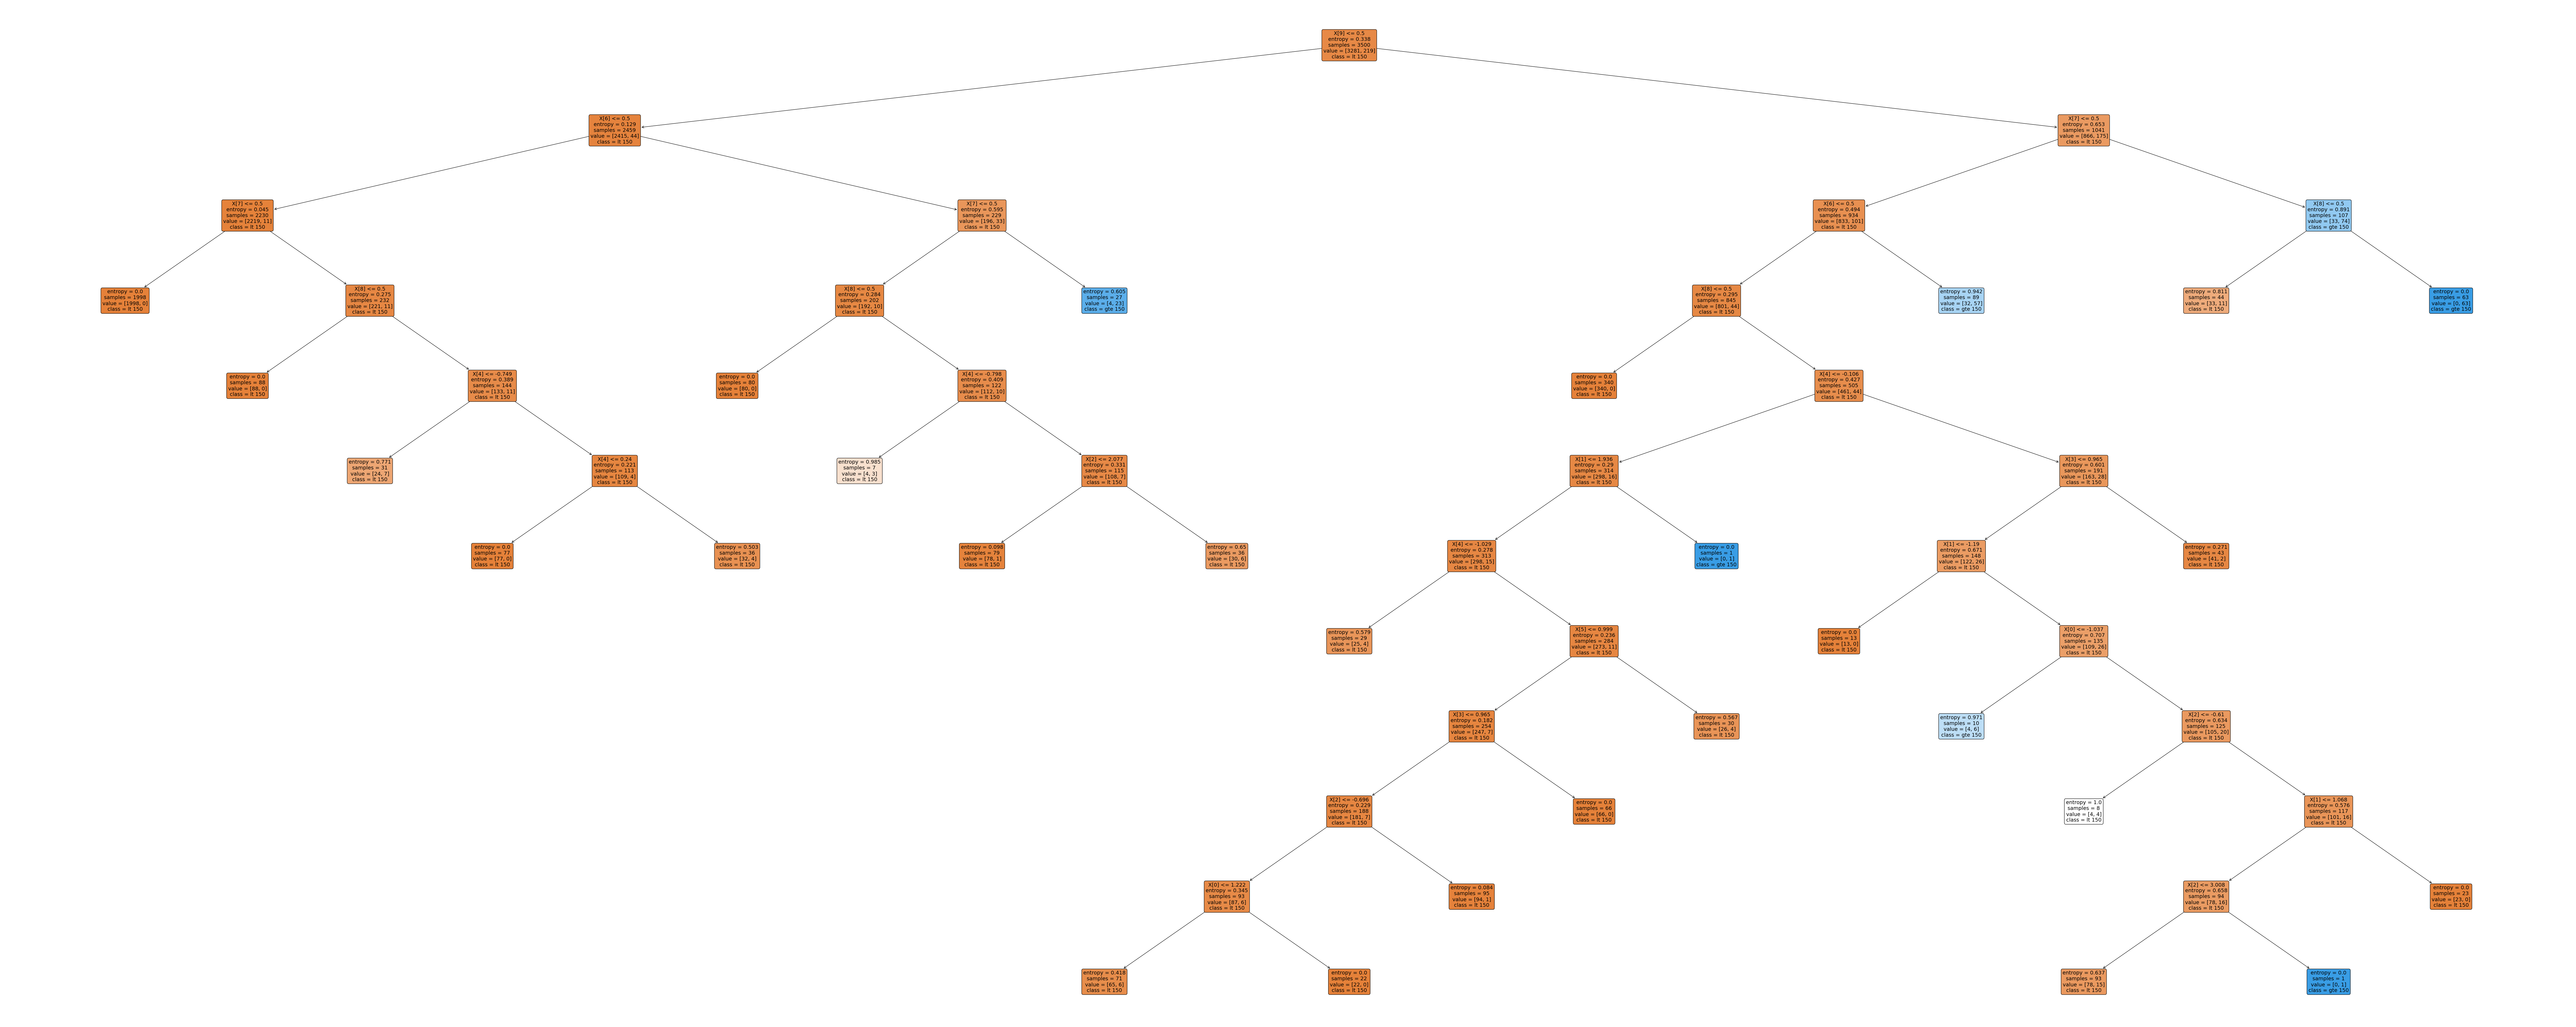

In [60]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(125,50))
tree = plot_tree(grid_search.best_estimator_,
              class_names=['lt 150', 'gte 150'], 
              filled=True, 
              rounded=True, 
              fontsize=14)

### Best Estimators for the 3 models

In [63]:
bestrecall_logistic

LogisticRegression(max_iter=1060, solver='liblinear')

In [64]:
bestrecall_SVM

SVC(C=24, kernel='poly')

In [65]:
bestrecall_dtree

DecisionTreeClassifier(criterion='entropy', max_depth=11, max_leaf_nodes=53,
                       min_impurity_decrease=0.0005, min_samples_split=93)

## Summary

Arranged by recall, the best models are:

In [67]:
performance.sort_values(by=['Recall'],ascending=False)

,model,Accuracy,Precision,Recall,F1
0,Decision Tree,0.966000,0.705128,0.662651,0.683230
0,Logistic Regression,0.978000,1.000000,0.602410,0.751880
0,SVM,0.974667,0.909091,0.602410,0.724638


## Performance Evaluation

Recall value has been taken here in consideration to give false negatives more weight as to reduce the positive cases that are misclassified by the model as negatives.

As per the above matrix, the best performance is of the Decision Tree with 66.26% recall score. The Logistic Regression and SVM has the recall value of 60.24%. 

With this summary we can tell the manager that 66% people were identified correctly with the D tree model, based on which he can contact the ones without CD Account for the marketing campaign. 